In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as backend

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
#Now we will see our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


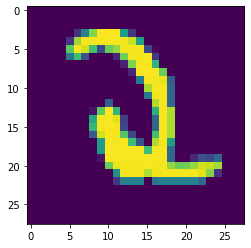

2


In [4]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[400])
plt.show()
print(y_train[400])

In [5]:
num_classes = 10
epochs = 5
img_rows = 28 
img_cols = 28

In [6]:
#normalizing 
x_train = x_train.astype(float)
x_train = x_train / 255
x_test = x_test.astype(float)
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [7]:
#format in which image are feed to our model 
#there are two cases possible either we can have channel first than image dimension
#or we can have dimension first than channel 
#we have one channel as it is a grey scale image therfore '1'
if backend.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)

In [8]:
#build our model
#BY DEFAULT STRIDE IS 1
def train_mnist(x_train, y_train):
    
    # Model Definition:
    # - A Flatten layer that receives inputs with the same shape as the images
    # - A Dense layer with 512 units and ReLU activation function
    # - A Dense layer with 10 units and softmax activation function
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    # Fit the model for 1 epoch
    # and save the trained model
    model.fit(x_train, y_train, epochs=epochs)

    model.evaluate(x_test, y_test)
    
    model.summary()

    return model

In [9]:
model = train_mnist(x_train, y_train)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2205 - accuracy: 0.9353
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0960 - accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9831
Epoch 5/5
313/313 [==============================] - 0s 632us/step - loss: 0.0624 - accuracy: 0.9818
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
             

In [10]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")

In [11]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'./models')